In [1]:
#importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal 

In [2]:
#Cargar los datos
moscow = pd.read_csv("data/Moscow", delimiter= "\s+", skiprows=4 , skipfooter=1, names= ["year","hora", "count"])
newark = pd.read_csv("data/Newark", delimiter= "\s+", skiprows=4 , skipfooter=1, names= ["year","hora", "count"])
mcmurdo = pd.read_csv("data/Mcmurdo", delimiter= "\s+", skiprows=4 , skipfooter=1, names= ["year","hora", "count"])
ssn = pd.read_csv("data/SN_d_tot_V2.0.csv", delimiter = ";" , header= 0)
ssn_0 = np.array(ssn.ssn)
time = np.array(ssn.decimal)

C:\Users\Miguel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  
C:\Users\Miguel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Miguel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [3]:
#Tratamiento de los datos

moscow.drop(columns= "hora") #eliminar colunma
moscow = np.array(moscow["count"])
moscow = np.where(moscow >10000, moscow * (9543. / 14342) , moscow )# arreglar datos
moscow[moscow <= 7500.] = np.NaN #quitar los de abajo

newark.drop(columns= "hora") #eliminar colunma
newark = np.array(newark["count"])
newark = np.where(newark >5000, newark * (3621. / 5927) , newark )# arreglar datos
newark[newark <= 2500.] = np.NaN #quitar los de abajo

mcmurdo.drop(columns= "hora") #eliminar colunma
mcmurdo = np.array(mcmurdo["count"])
mcmurdo = np.where(mcmurdo >15000, mcmurdo * (10097. / 16874) , mcmurdo )# arreglar datos
mcmurdo[mcmurdo <= 7400] = np.NaN #quitar los de abajo
mcmurdo[mcmurdo > 11000 ] = np.NaN

C:\Users\Miguel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater


In [65]:
ssn_0 = np.array(ssn.ssn)
time = np.array(ssn.decimal)
# Normaliza 
moscow1 = moscow*1. / np.nanmax(moscow)
newark1 = newark*1. / np.nanmax(newark)
mcmurdo1 = mcmurdo*1. / np.nanmax(mcmurdo)
ssn_01 = ssn_0 * 1. / np.max(ssn_0)

In [68]:
#Función para suavisar los datos
def rolling(y,n):  #recibe el vector y cuantos va a tomar para el promedio de suavisar
    y = pd.DataFrame(y)
    rolling = y.rolling(window = n , center = True , min_periods = 1)
    return  rolling.mean()

In [66]:
#Suaviza los datos
moscow_suavisada = rolling(pd.DataFrame(moscow).interpolate(),200)
newark_suavisada = rolling(pd.DataFrame(newark).interpolate(),200)
mcmurdo_suavisada = rolling(pd.DataFrame(mcmurdo).interpolate(),200)
ssn_00 = rolling(pd.DataFrame(ssn_0).interpolate(),200)

In [67]:
# Normaliza 
moscow_suavisada_n = moscow_suavisada*1. / np.nanmax(moscow_suavisada)
newark_suavisada_n = newark_suavisada*1. / np.nanmax(newark_suavisada)
mcmurdo_suavisada_n = mcmurdo_suavisada*1. / np.nanmax(mcmurdo_suavisada)
ssn_00_n = ssn_00 * 1. / np.max(ssn_00)

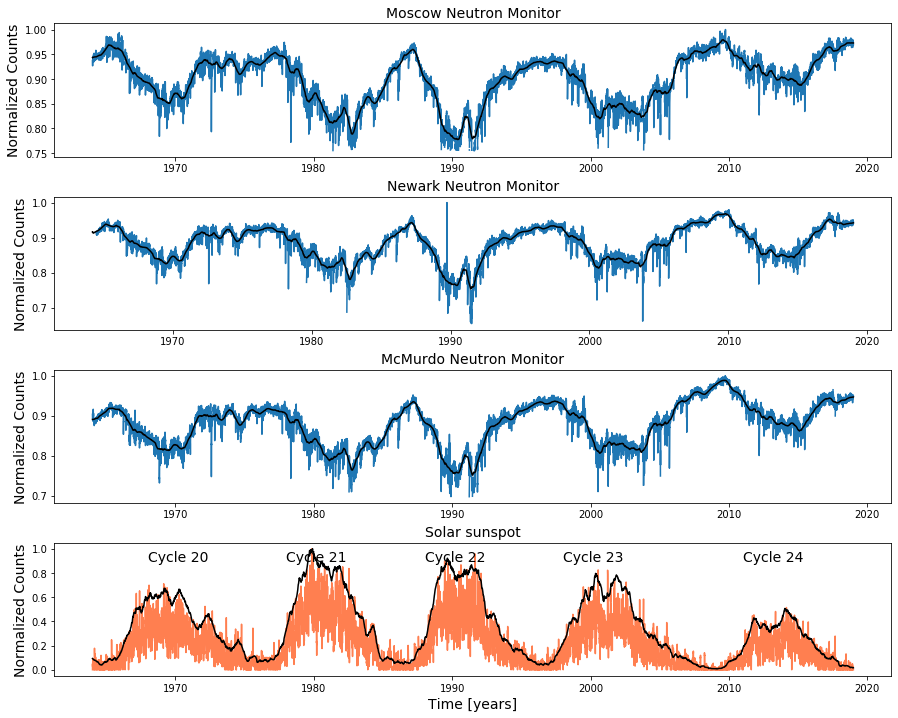

In [74]:
plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=0.3)
plt.subplot(4, 1, 1)
plt.ylabel("Normalized Counts",fontsize=14)
plt.title("Moscow Neutron Monitor",fontsize=14)
plt.plot(time,moscow1)
plt.plot(time,moscow_suavisada, color = "k")
plt.subplot(4, 1, 2)
plt.ylabel("Normalized Counts",fontsize=14)
plt.plot(time,newark1)
plt.title("Newark Neutron Monitor", fontsize=14)
plt.plot(time,newark_suavisada, color = "k")
plt.subplot(4, 1, 3)
plt.ylabel("Normalized Counts",fontsize=14)
plt.title("McMurdo Neutron Monitor",fontsize=14)
plt.plot(time,mcmurdo1)
plt.plot(time,mcmurdo_suavisada, color = "k")
plt.subplot(4, 1, 4)
plt.ylabel("Normalized Counts",fontsize=14)
plt.plot(time,ssn_01, color = 'coral')
plt.plot(time,ssn_00_n, color = 'k')
plt.xlabel("Time [years]",fontsize=14)
plt.title("Solar sunspot",fontsize=14)
plt.text(1968,0.9, 'Cycle 20',fontsize=14 , color = 'k')
plt.text(1978,0.9, "Cycle 21",fontsize=14 , color = 'k')
plt.text(1988,0.9, "Cycle 22",fontsize=14 , color = 'k')
plt.text(1998,0.9, "Cycle 23",fontsize=14 , color = 'k')
plt.text(2011,0.9, "Cycle 24",fontsize=14 , color = 'k')
plt.show()

In [58]:
def correlation (y1,y2,y3): #datos a correlacionar y el tiempo
    npts = len(y3)
    lags = np.arange(-npts + 1, npts)
    x = np.linspace(np.min(y3), np.max(y3), npts)
    ccov = np.correlate(y1 - np.mean(y1), y2 - np.mean(y2), mode="full")
    ccor = ccov / (npts * np.std(y1) * np.std(y2))
    ccor = list(ccor)
    lags = list(lags)
    time_lag = ccor.index(min(ccor)) - lags.index(0)

    return ccor , ccov , lags, time_lag

In [84]:
#correlaciona los datos
ccor_moscow , ccov_moscow , lags_moscow ,time_lag_moscow = correlation(list(moscow_suavisada[0]) , list(ssn_00[0]) , time)
ccor_mcmurdo, ccov_mcmurdo , lags ,time_lag_mcmurdo= correlation(list(mcmurdo_suavisada[0]) , list(ssn_00[0]) , time)
ccor_newark , ccov_newark , lags_newark ,time_lag_newark = correlation(list(newark_suavisada[0][83:]) , list(ssn_00[0][83:]) , time[83:])
time = list(time)
ccor_moscow_21 , ccov_moscow_21 , lags_moscow_21 ,time_lag_moscow_21 = correlation(list(moscow_suavisada[0][time.index(1976.165) : 8340]) ,
                                                                                   list(ssn_00[0][time.index(1976.165) : 8340]) , 
                                                                                   time[time.index(1976.165):8340])

In [89]:
#time_lag_moscow_21, np.min(ccor_moscow_21)
time_lag_moscow, np.min(ccor_moscow)

(180, -0.8693701925012051)

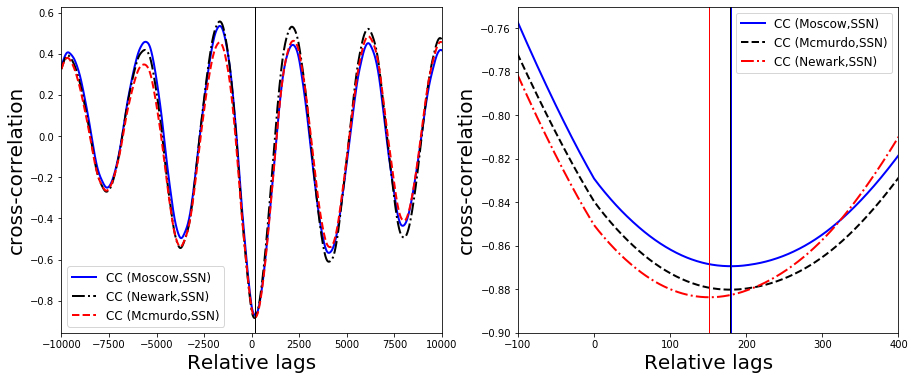

In [60]:
#representación grafica de la correlación cruzada y se muestra el desfase para cada uno de los detectores
plt.figure(figsize=(15,6))
plt.subplot (1,2,1)
plt.plot(lags_moscow,ccor_moscow,label=r"CC (Moscow,SSN)",lw=2,color='blue')
plt.plot(lags_newark,ccor_newark,label=r"CC (Newark,SSN)",lw=2,color='k', ls = '-.')
plt.plot(lags,ccor_mcmurdo,label=r"CC (Mcmurdo,SSN)",lw=2,color='r' , ls = "--")
plt.xlim(-10000,10000)
plt.axvline(lags_moscow[np.argmin(ccor_moscow)], color='Blue', linewidth=1)
plt.axvline(lags_newark[np.argmin(ccor_newark)], color='r', linewidth=1)
plt.axvline(lags[np.argmin(ccor_mcmurdo)], color='k', linewidth=1)
plt.xlabel("Relative lags",fontsize=20)
plt.ylabel("cross-correlation", fontsize=20)
plt.legend(fontsize=12)

plt.subplot(1,2,2)
plt.plot(lags_moscow,ccor_moscow,label=r"CC (Moscow,SSN)",lw=2,color='blue')
plt.plot(lags,ccor_mcmurdo,label=r"CC (Mcmurdo,SSN)",lw=2,color='k' , ls = "--")
plt.plot(lags_newark,ccor_newark,label=r"CC (Newark,SSN)",lw=2,color='r', ls = '-.')
plt.xlim(-100,400)
plt.ylim(-0.9,-0.75)
plt.axvline(lags_moscow[np.argmin(ccor_moscow)], color='Blue', linewidth=1)
plt.axvline(lags_newark[np.argmin(ccor_newark)], color='r', linewidth=1)
plt.axvline(lags[np.argmin(ccor_mcmurdo)], color='k', linewidth=1)

plt.xlabel("Relative lags",fontsize=20)
plt.ylabel("cross-correlation", fontsize=20)
plt.legend(fontsize=12)
plt.show()

In [61]:
print(time_lag_moscow, time_lag_newark , time_lag_mcmurdo)
print(np.min(ccor_moscow) , np.min(ccor_newark), np.min(ccor_mcmurdo))

180 151 179
-0.8693701925012051 -0.8836525833633185 -0.8801575390186346


###### pd.DataFrame(data = [[-0.8692,180],[-0.8836,151],[ -0.8801,179]],
             index = ["Moscow","Newark","McMurdo"],
            columns = ["Correlation","Time Lag [Days]"])


In [29]:
time1 = list(time[time.index(1976.165) : 8340])
ssn_sc_21 = np.array(ssn_00[time.index(1976.165) : 8340] )
moscow_suavisada_21 = np.array(moscow_suavisada[time.index(1976.165) : 8340] )
moscow_suavisada_21 = [float(i) for i in moscow_suavisada_21]
newark_suavisada_21 = np.array(newark_suavisada[time.index(1976.165) : 8340] )
newark_suavisada_21 = [float(i) for i in newark_suavisada_21]
mcmurdo_suavisada_21 = np.array(mcmurdo_suavisada[time.index(1976.165) :8340])
mcmurdo_suavisada_21 = [float(i) for i in mcmurdo_suavisada_21]

In [49]:
correlation(moscow_suavisada_21 , ssn_sc_21 ,time1)

ValueError: object too deep for desired array

In [47]:
#list(mcmurdo_suavisada[0])
type(mcmurdo_suavisada_21)

list